# I. Polynomial Regression
These are like what you do in high school algebra, where you have different variables raised to a different powers, each weighted by its own coefficient. So a Degree 4 polynomial would be something like

solution = a(w) + b(x^2) + c(y^3) + d(z^4)

#### But then how did the computer determine there were 4 variables?
It didn't - We manually set that as the data scientists/ML engineers

#### Then why not start off every experiment with the most complex predicator i.e. Degree 20 and let the model do the heavy lifting of adjusting coefficients down to zero?
- The more complex the model, the more likely it will contort to fit the training data (overfitting).
- More complex formulas put more pressure on processing time

In [35]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Lets create 100 datapoints and create random datapoints around a formula of

y = 2 + x + 0.5(x^2) + (random noise)

In [26]:
m = 100

# we're taking a random value from 0 to 1 and multiplying it by 6 (making an X range of 0 to +6, but then shifting leftwards 3, so it'ss -3 through +3
X = 6 * np.random.rand(m, 1) - 3

y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

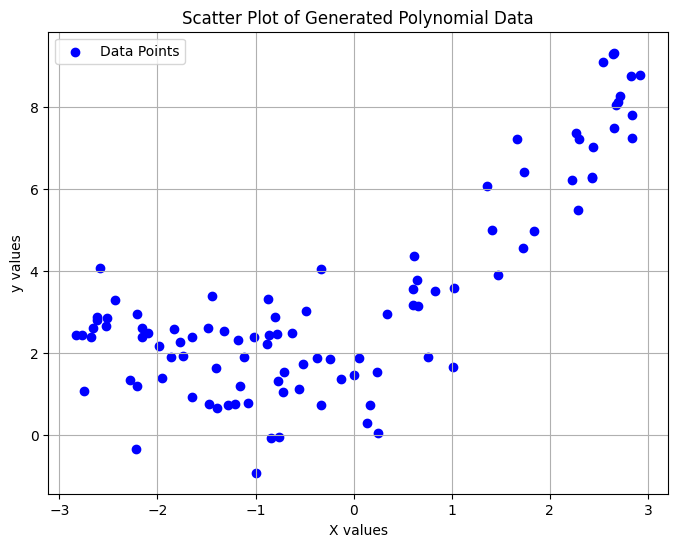

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data Points")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Scatter Plot of Generated Polynomial Data")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.23666455])

In [32]:
X_poly[0]

array([-0.23666455,  0.05601011])

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)

# the magic where we creeate the polynomial features 
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)               # Predict y values for the curve

intercept = lin_reg.intercept_[0]  # Intercept (θ0)
coef_1 = lin_reg.coef_[0][0]       # Coefficient for x (θ1)
coef_2 = lin_reg.coef_[0][1]       # Coefficient for x^2 (θ2)

print(f"The polynomial regression model is: y = {intercept:.3f} + {coef_1:.3f}*x + {coef_2:.3f}*x^2")

The polynomial regression model is: y = 2.069 + 1.005*x + 0.458*x^2


#### Formula
A formula was successfully created, but the data visualization below looks absurd because this particular "pattern" is too weak. Regardless, it's still illustrative and we'll just move on.

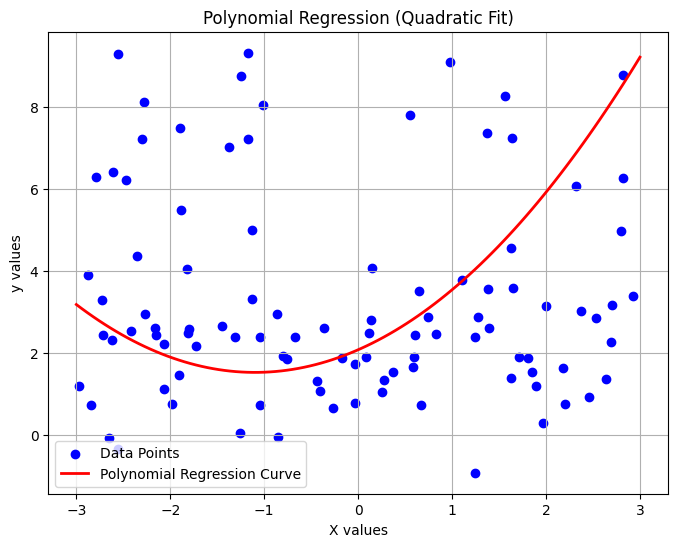

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data Points")  # Original data points
plt.plot(X_new, y_new, color="red", linewidth=2, label="Polynomial Regression Curve")  # Polynomial curve
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Polynomial Regression (Quadratic Fit)")
plt.legend()
plt.grid(True)
plt.show()

# II. Learning Curve